<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Prediction-Research/blob/main/SPX_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
369/369 - 6s - 18ms/step - loss: 0.0045
Epoch 2/50
369/369 - 2s - 6ms/step - loss: 0.0012
Epoch 3/50
369/369 - 2s - 5ms/step - loss: 0.0016
Epoch 4/50
369/369 - 2s - 7ms/step - loss: 8.7159e-04
Epoch 5/50
369/369 - 2s - 5ms/step - loss: 8.3581e-04
Epoch 6/50
369/369 - 2s - 5ms/step - loss: 8.5731e-04
Epoch 7/50
369/369 - 3s - 8ms/step - loss: 8.4585e-04
Epoch 8/50
369/369 - 2s - 4ms/step - loss: 7.7274e-04
Epoch 9/50
369/369 - 2s - 7ms/step - loss: 0.0011
Epoch 10/50
369/369 - 1s - 4ms/step - loss: 8.3370e-04
Epoch 11/50
369/369 - 1s - 3ms/step - loss: 9.2919e-04
Epoch 12/50
369/369 - 1s - 3ms/step - loss: 6.8538e-04
Epoch 13/50
369/369 - 1s - 3ms/step - loss: 0.0011
Epoch 14/50
369/369 - 1s - 3ms/step - loss: 5.6922e-04
Epoch 15/50
369/369 - 2s - 5ms/step - loss: 8.9029e-04
Epoch 16/50
369/369 - 2s - 5ms/step - loss: 7.1636e-04
Epoch 17/50
369/369 - 1s - 3ms/step - loss: 7.7154e-04
Epoch 18/50
369/369 - 1s - 3ms/step - loss: 6.4764e-04
Epoch 19/50
369/369 - 1s - 3ms/step - 

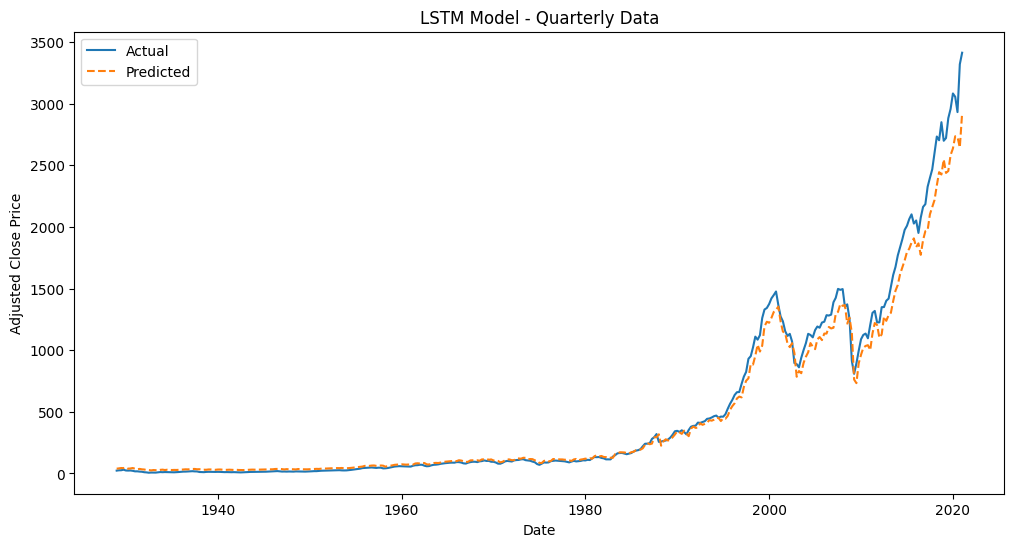

Quarterly Data - MAE: 56.74789821877478
Quarterly Data - RMSE: 106.48704646620952
Quarterly Forecast: [[2997.249 ]
 [2908.3748]
 [2851.5925]
 [2799.2427]]
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 2s - 27ms/step - loss: 0.0340
Epoch 2/50
92/92 - 0s - 3ms/step - loss: 0.0046
Epoch 3/50
92/92 - 0s - 4ms/step - loss: 0.0027
Epoch 4/50
92/92 - 1s - 10ms/step - loss: 0.0022
Epoch 5/50
92/92 - 0s - 4ms/step - loss: 0.0021
Epoch 6/50
92/92 - 0s - 4ms/step - loss: 0.0021
Epoch 7/50
92/92 - 1s - 7ms/step - loss: 0.0023
Epoch 8/50
92/92 - 1s - 7ms/step - loss: 0.0025
Epoch 9/50
92/92 - 0s - 5ms/step - loss: 0.0034
Epoch 10/50
92/92 - 0s - 3ms/step - loss: 0.0023
Epoch 11/50
92/92 - 0s - 3ms/step - loss: 0.0023
Epoch 12/50
92/92 - 0s - 3ms/step - loss: 0.0023
Epoch 13/50
92/92 - 0s - 3ms/step - loss: 0.0027
Epoch 14/50
92/92 - 0s - 3ms/step - loss: 0.0022
Epoch 15/50
92/92 - 0s - 3ms/step - loss: 0.0021
Epoch 16/50
92/92 - 0s - 2ms/step - loss: 0.0019
Epoch 17/50
92/92 - 0s - 2ms/step - loss: 0.0022
Epoch 18/50
92/92 - 0s - 2ms/step - loss: 0.0019
Epoch 19/50
92/92 - 0s - 3ms/step - loss: 0.0021
Epoch 20/50
92/92 - 0s - 2ms/step - loss: 0.0026
Epoch 21/50
92/92 - 0s - 3ms/step - lo

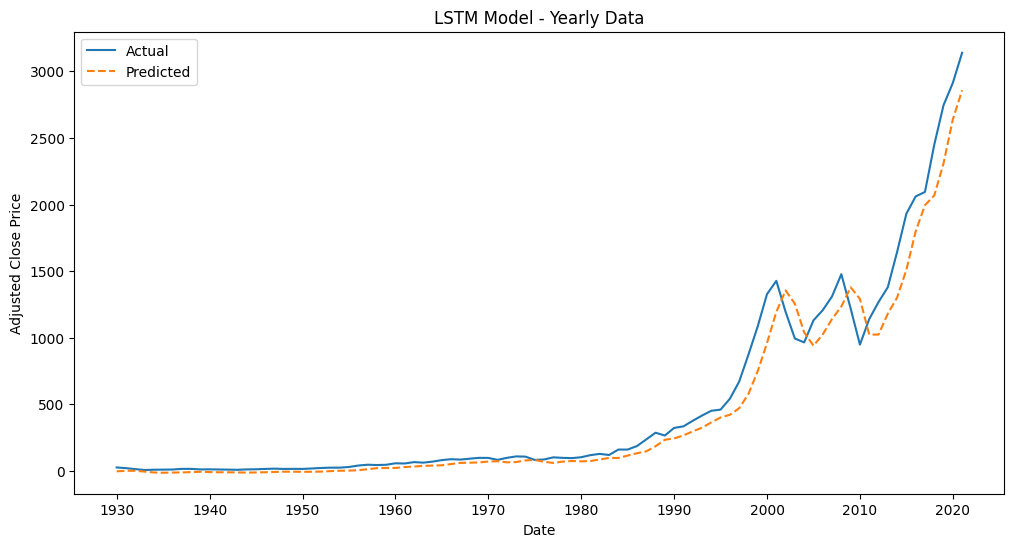

Yearly Data - MAE: 93.96591147375521
Yearly Data - RMSE: 144.689799306568
Yearly Forecast: [[3068.3364]
 [3098.3254]]


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('/content/SPX.csv')

# Convert Date column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample the data to get quarterly and yearly data
quarterly_data = data['Adj Close'].resample('Q').mean()
yearly_data = data['Adj Close'].resample('Y').mean()

# Function to create a dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
quarterly_data_scaled = scaler.fit_transform(quarterly_data.values.reshape(-1, 1))
yearly_data_scaled = scaler.fit_transform(yearly_data.values.reshape(-1, 1))

# Prepare the quarterly dataset for LSTM
look_back = 4  # Look back 4 quarters (1 year)
X_quarterly, Y_quarterly = create_dataset(quarterly_data_scaled, look_back)
X_quarterly = np.reshape(X_quarterly, (X_quarterly.shape[0], X_quarterly.shape[1], 1))

# Build the LSTM model for quarterly data
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_quarterly, Y_quarterly, epochs=50, batch_size=1, verbose=2)

# Make predictions
quarterly_forecasted_values_scaled = model.predict(X_quarterly)
quarterly_forecasted_values = scaler.inverse_transform(quarterly_forecasted_values_scaled)

# Forecast the next 4 quarters
X_input = quarterly_data_scaled[-look_back:].reshape((1, look_back, 1))
forecast_quarterly_scaled = []
for i in range(4):
    predicted_scaled = model.predict(X_input)
    forecast_quarterly_scaled.append(predicted_scaled[0, 0])
    X_input = np.append(X_input[:, 1:, :], predicted_scaled.reshape(1, 1, 1), axis=1)

forecast_quarterly = scaler.inverse_transform(np.array(forecast_quarterly_scaled).reshape(-1, 1))

# Calculate error metrics for quarterly data
mae_quarterly = mean_absolute_error(quarterly_data[look_back:], quarterly_forecasted_values)
rmse_quarterly = np.sqrt(mean_squared_error(quarterly_data[look_back:], quarterly_forecasted_values))

# Plot actual vs predicted for quarterly data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index[look_back:], quarterly_data[look_back:], label='Actual')
plt.plot(quarterly_data.index[look_back:], quarterly_forecasted_values, label='Predicted', linestyle='--')
plt.title('LSTM Model - Quarterly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Quarterly Data - MAE:", mae_quarterly)
print("Quarterly Data - RMSE:", rmse_quarterly)
print("Quarterly Forecast:", forecast_quarterly)

# Prepare the yearly dataset for LSTM
look_back_yearly = 2  # Look back 2 years
X_yearly, Y_yearly = create_dataset(yearly_data_scaled, look_back_yearly)
X_yearly = np.reshape(X_yearly, (X_yearly.shape[0], X_yearly.shape[1], 1))

# Build the LSTM model for yearly data
model_yearly = Sequential()
model_yearly.add(LSTM(50, return_sequences=True, input_shape=(look_back_yearly, 1)))
model_yearly.add(LSTM(50))
model_yearly.add(Dense(1))
model_yearly.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_yearly.fit(X_yearly, Y_yearly, epochs=50, batch_size=1, verbose=2)

# Make predictions
yearly_forecasted_values_scaled = model_yearly.predict(X_yearly)
yearly_forecasted_values = scaler.inverse_transform(yearly_forecasted_values_scaled)

# Forecast the next 2 years
X_input_yearly = yearly_data_scaled[-look_back_yearly:].reshape((1, look_back_yearly, 1))
forecast_yearly_scaled = []
for i in range(2):
    predicted_scaled = model_yearly.predict(X_input_yearly)
    forecast_yearly_scaled.append(predicted_scaled[0, 0])
    X_input_yearly = np.append(X_input_yearly[:, 1:, :], predicted_scaled.reshape(1, 1, 1), axis=1)

forecast_yearly = scaler.inverse_transform(np.array(forecast_yearly_scaled).reshape(-1, 1))

# Calculate error metrics for yearly data
mae_yearly = mean_absolute_error(yearly_data[look_back_yearly:], yearly_forecasted_values)
rmse_yearly = np.sqrt(mean_squared_error(yearly_data[look_back_yearly:], yearly_forecasted_values))

# Plot actual vs predicted for yearly data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index[look_back_yearly:], yearly_data[look_back_yearly:], label='Actual')
plt.plot(yearly_data.index[look_back_yearly:], yearly_forecasted_values, label='Predicted', linestyle='--')
plt.title('LSTM Model - Yearly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Yearly Data - MAE:", mae_yearly)
print("Yearly Data - RMSE:", rmse_yearly)
print("Yearly Forecast:", forecast_yearly)
